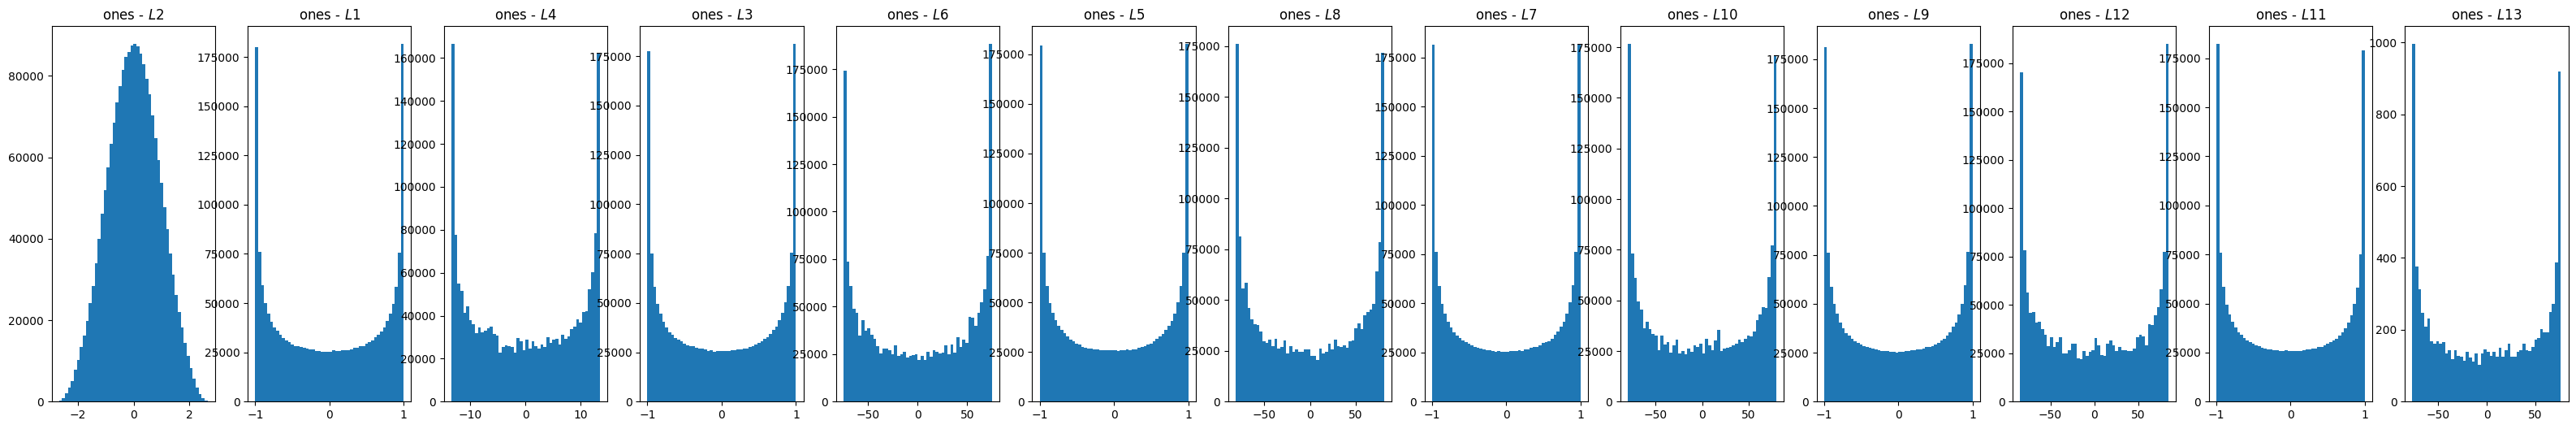

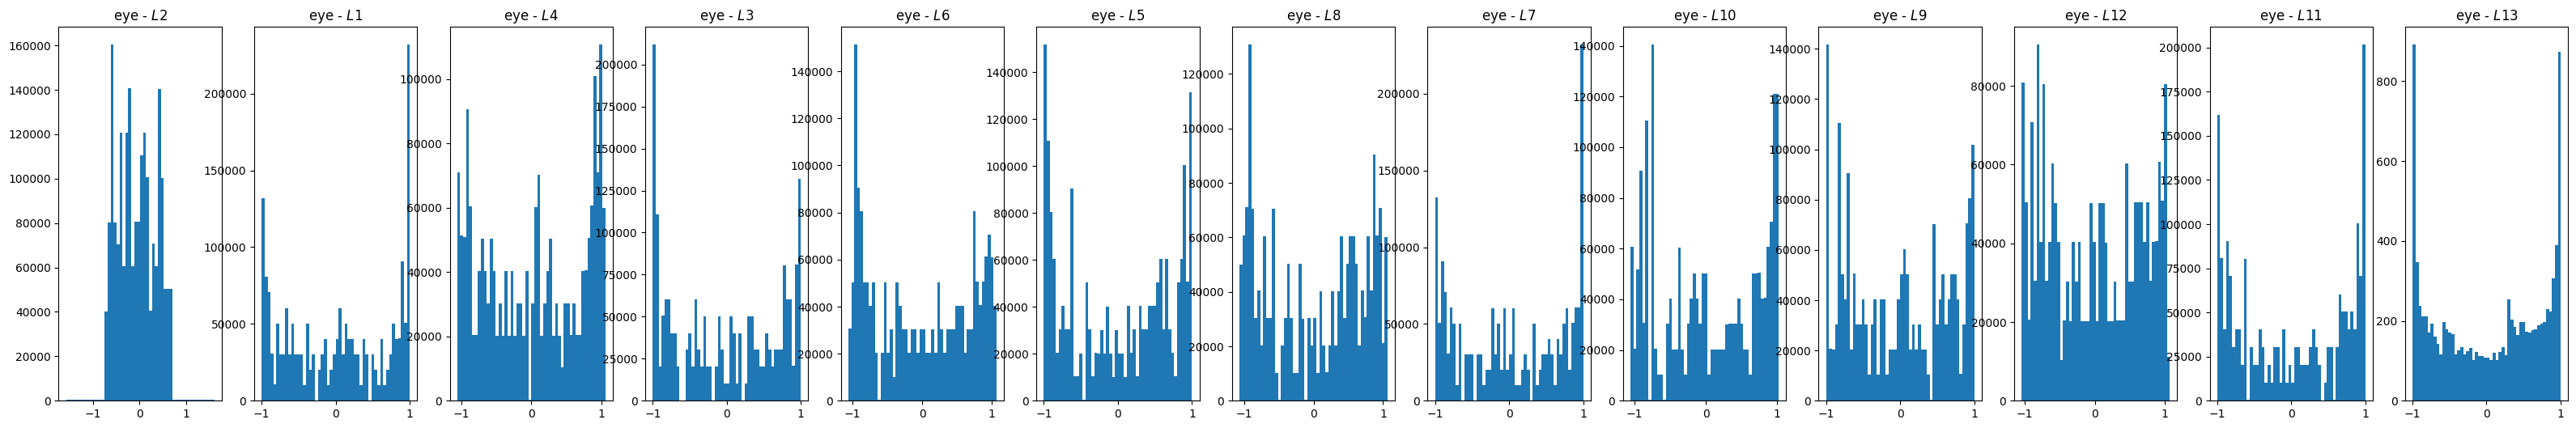

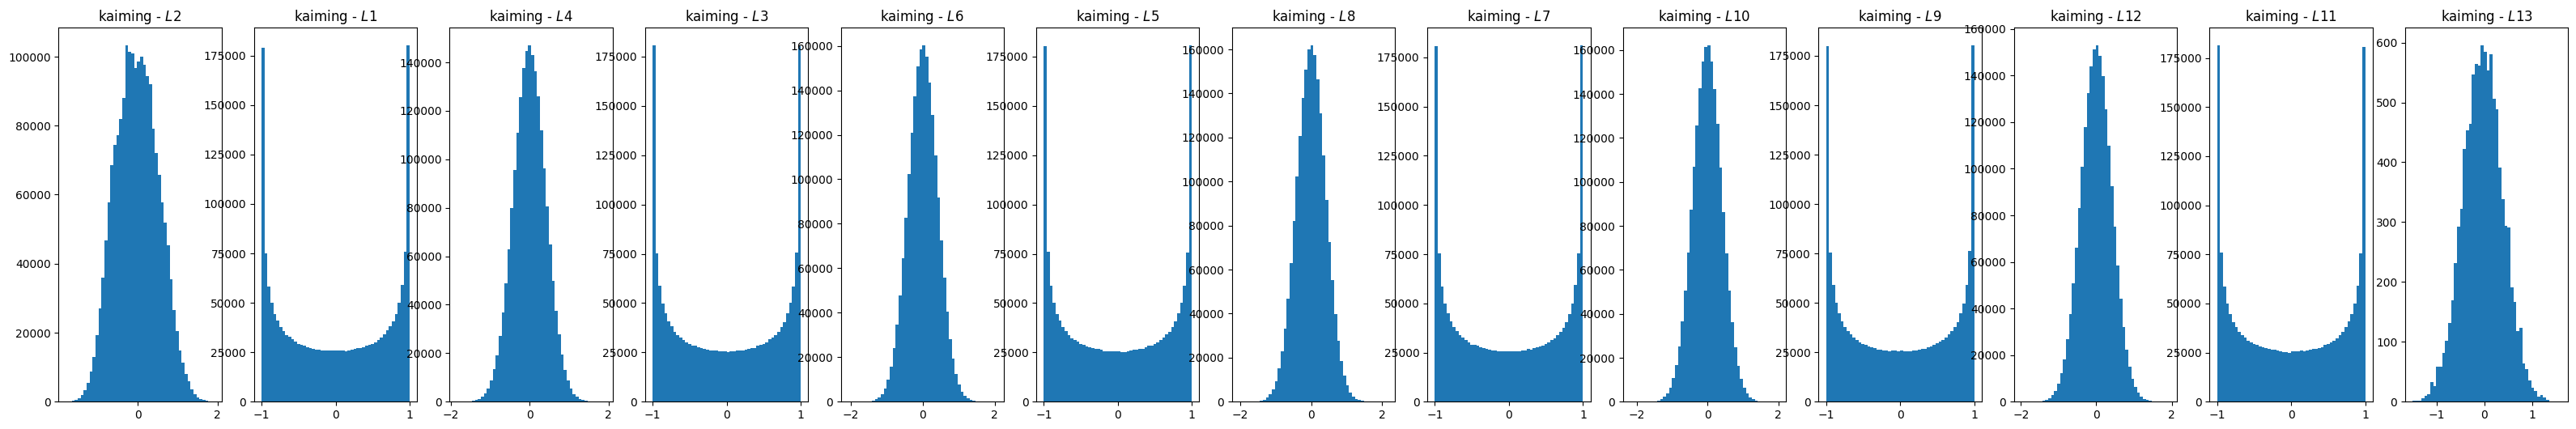

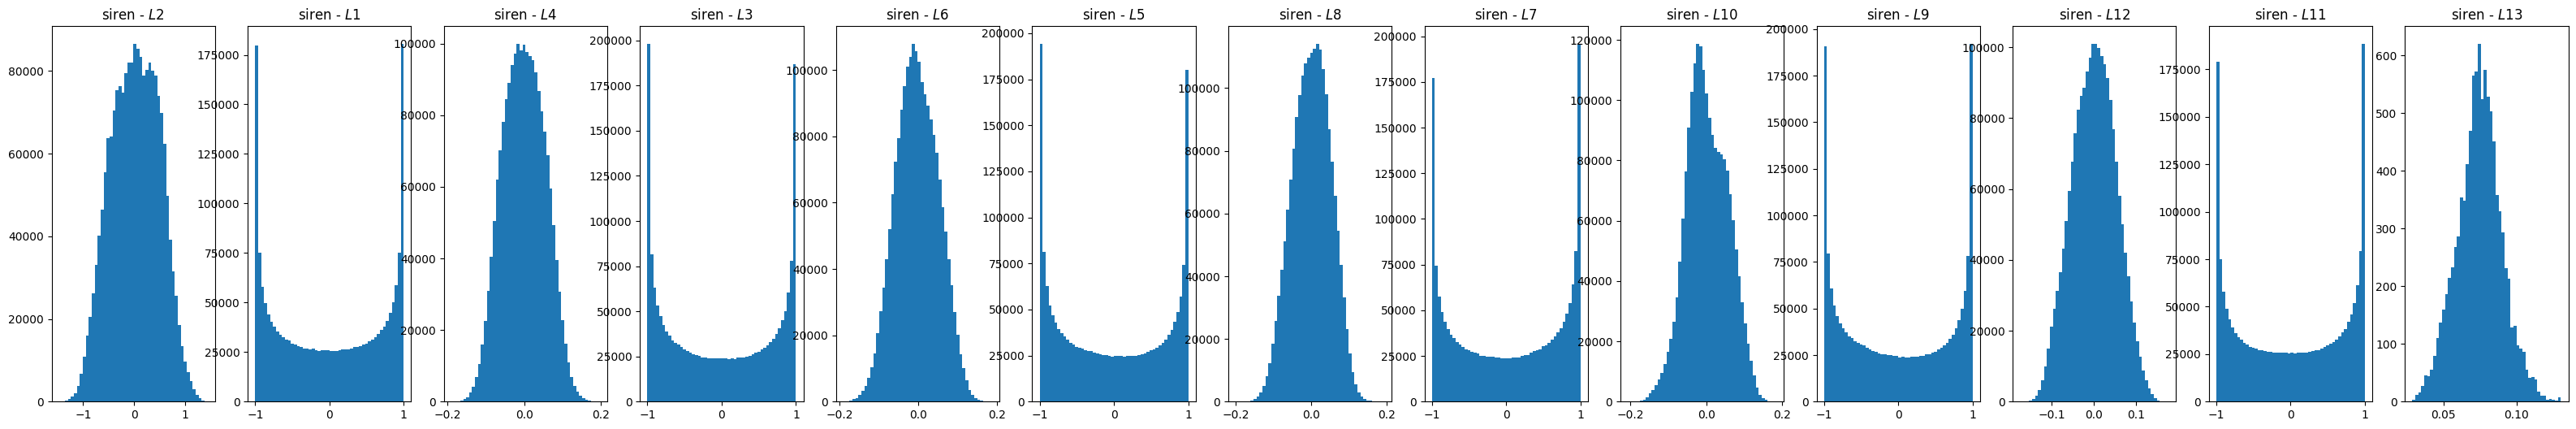

In [2]:
import pathlib
from functools import partial
import torch
import matplotlib.pyplot as plt
from auxils import ImageSiren  # Make sure this import is correct for your environment

torch.manual_seed(2)

# Initialization functions
init_functions = {
    "ones": torch.nn.init.ones_,
    "eye": torch.nn.init.eye_,
    "kaiming": partial(torch.nn.init.kaiming_uniform_, a=5 ** (1 / 2)),
    "siren": None,  # Assuming this is handled appropriately within ImageSiren
}


def collect_activations(inst, inp, out, func_name, layer_name):
    if func_name not in activations:
        activations[func_name] = {}
    activations[func_name][layer_name] = out.detach()

# Iterate through each initialization function
for fname, func in init_functions.items():

    # Dictionary to store activations
    activations = {}


    model = ImageSiren(
        hidden_layers=5,
        hidden_features=200,
        first_omega=30,
        hidden_omega=30,
        custom_init_function_=func,
    )

    # Register hooks to collect activations
    for i, layer in enumerate(model.net.modules()):
        if i == 0:  # Skip the first layer as it's not a hidden layer
            continue
        layer_name = f"$L{i}$"
        layer.register_forward_hook(partial(collect_activations, func_name=fname, layer_name=layer_name))

    # Generate input data and forward pass to collect activations
    inp = 2 * (torch.rand(10000, 2) - 0.5)  # Example input
    _ = model(inp)

    # Plotting histograms for each initialization function
    for fname, layers in activations.items():
        plt.figure(figsize=(40, 6))
        for i, (layer_name, activation) in enumerate(layers.items()):
            plt.subplot(1, len(layers), i + 1)
            plt.hist(activation.numpy().flatten(), bins=50)
            plt.title(f"{fname} - {layer_name}")
        plt.show()
